In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
!pip install facenet-pytorch

     |████████████████████████████████| 1.9MB 16.4MB/s 


In [90]:
import cv2
import torch
import numpy as np
from facenet_pytorch import MTCNN
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os


In [ ]:
!unzip "/content/drive/MyDrive/Emotions Dataset.zip"

In [ ]:

print(os.listdir("/content/Emotions Dataset"))

['Neutral', 'Happy', 'Angry']


In [107]:
mtcnn = MTCNN()

In [ ]:
MAIN_PATH = "/content/Emotions Dataset"
for directory in os.listdir(MAIN_PATH):
  for image in os.listdir(MAIN_PATH+"/"+directory):
    try:
      image_name = image
      image = MAIN_PATH+"/"+directory+"/"+image
      if directory in os.listdir("/content/drive/MyDrive/Emotions Dataset Processed"):
        pass
      else:
        os.mkdir(f"/content/drive/MyDrive/Emotions Dataset Processed/{directory}")
      img = cv2.imread(image)
      boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)
      faces = []
      id = 0
      for box in boxes:
        box = [int(i) for i in box]
        x1,y1,w,h = box
        x2, y2 = w, h
        face = img[y1:y2, x1:x2]
        faces.append(face)
      for face_image in faces:
        face_image = cv2.resize(face_image, (85, 85))
        id += 1
        cv2.imwrite(f"/content/drive/MyDrive/Emotions Dataset Processed/{directory}/{id}_{image_name}", face_image)
    except:
      pass

In [ ]:
!zip -r "/content/Emotions Dataset.zip" "/content/drive/MyDrive/Emotions Dataset Processed"

**Preparing For Traning**

In [93]:
from PIL import Image

In [102]:
dataset_path = "/content/content/drive/MyDrive/Emotions Dataset Processed"

labels = []
images = []

for directory in os.listdir(dataset_path):
  for image in os.listdir(dataset_path+"/"+directory):
    try:
      image_path = dataset_path+"/"+directory+"/"+image
      img = Image.open(image_path).convert('L')
      img_array = np.array(img, 'uint8')
      images.append(img_array)
      if directory == "Angry":
        labels.append(1)
      if directory == "Happy":
        labels.append(2)
      if directory == "Neutral":
        labels.append(3)
    except:
      pass

In [103]:
print(len(images), len(labels))

340 340


In [104]:
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(images, np.array(labels))

In [105]:
recognizer.write("model.yml")

In [106]:
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read("model.yml")

In [111]:
test_image = cv2.imread("/content/depositphotos_74925449-stock-photo-men-human-face-smiling.jpg")
boxes, probs, landmarks = mtcnn.detect(test_image, landmarks=True)

In [124]:
box = [int(i) for i in box]
x1,y1,w,h = box
x2, y2 = w, h
face = test_image[y1:y2, x1:x2]
test = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

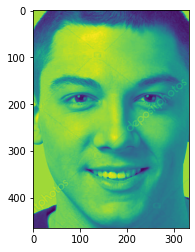

In [125]:
plt.imshow(test)